In [12]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from matplotlib.colors import ListedColormap

# plt.style.use("fivethirtyeigh")  # optional step

In [55]:
class Perceptron:
    def __init__(self, eta: float=None, epochs: int=None):
        self.weight = np.random.randn(3)*1e-4 # small random weights
        training = (eta is not None) and (epochs is not None)
        if training:
            print(f"inital weights before training: \n{self.weight}")
        self.eta = eta
        self.epochs = epochs


    def _z_outcome(self, inputs, weight):
        return np.dot(inputs, weight)
    
    def activation_function(self, z):
        return np.where(z > 0 , 1, 0)


    def fit(self, x, y):
        self.x = x
        self.y = y

        x_with_bias = np.c_[self.x, -np.ones((len(self.x), 1))]
        print(f"x with bias: \n {x_with_bias}")

        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch >> {epoch}")
            print("--"*10)
            z = self._z_outcome(x_with_bias, self.weight)
            y_hat = self.activation_function(z)
            print(f"predicted value after forward pass: \n {y_hat}")
            self.error = self.y - y_hat
            print(f"error: \n{self.error}")
            
            self.weight = self.weight + self.eta + np.dot(x_with_bias.T, self.error)
            print(f"updated weights after epoch: {epoch + 1}/{self.epochs}: \n{self.weight}")
            print("##"*10)

    def predict(self, x):
        x_with_bias = np.c_[x, -np.ones((len(x), 1))]
        z = self._z_outcome(x_with_bias, self.weight)
        return self.activation_function(z)

    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"\ntotal loss: {total_loss}\n")
        return total_loss
    
    def create_dir_return_path(self, model_dir, filename):
        os.makedirs(model_dir, exist_ok=True)
        return os.path.join(model_dir, filename)
    
    def save(self, filename, model_dir=None):
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir, filename)
            joblib.dump(self, model_file_path)
        else:
            model_file_path = self._create_dir_return_path("model", filename)
            joblib.dump(self, model_file_path)
    
    def load(self, filepath):
        return joblib.load(filapath)
    

In [56]:
def prepare_data(df, target_col="y"):
    x = df.drop(target_col, axis=1)
    
    y= df[target_col]
    
    return x, y

In [57]:
import pandas as pd

AND = {
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y":[0,0,0,1]
}

df_AND = pd.DataFrame(AND)
df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [58]:
x, y = prepare_data(df_AND)

ETA = 0.1 # 0 and 1
EPOCHS = 10

model_and = Perceptron(eta=ETA, epochs=EPOCHS)
model_and.fit(x, y)

_ = model_and.total_loss()

inital weights before training: 
[9.24172521e-05 1.08284958e-04 2.04935702e-05]
x with bias: 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
 [0 1 1 1]
error: 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[-0.89990758 -0.89989172  2.10002049]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
 [0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[0.20009242 0.20010828 1.20002049]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
 [0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[1.30009242 1.30010828 0.30002049]
####################
--------------------
for epoch >> 3
--------------------
predicted value aft

In [59]:
import pandas as pd

OR = {
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y":[0,0,0,1]
}

df_OR = pd.DataFrame(OR)
df_OR

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [60]:
x, y = prepare_data(df_OR)

ETA = 0.1 # 0 and 1
EPOCHS = 10

model_or = Perceptron(eta=ETA, epochs=EPOCHS)
model_or.fit(x, y)

_ = model_and.total_loss()

inital weights before training: 
[-6.81086004e-05  7.40369192e-05  1.10257077e-04]
x with bias: 
 [[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
predicted value after forward pass: 
 [0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[ 1.09993189  1.10007404 -0.89988974]
####################
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
 [1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[0.19993189 0.20007404 2.20011026]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
 [0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[1.29993189 1.30007404 1.30011026]
####################
--------------------
for epoch >> 3
--------------------
predicted value 

In [65]:
def save_plot(df, model, filename="plot.png",  plot_dir = "plots"):
    def _create_base_plot(df):
        df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="coolwarm")
        plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
        plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
    
    
        figure = plt.gcf()
        figure.set_size_inches(10, 8)
        
    def _plot_decision_regions(x, y, classifier, resolution=0.02):
        colors = ("cyan", "lightgreen")
        cmap = ListedColormap(colors)
        
        x = x.values # as an array
        x1 = x[:, 0]
        x2 = x[:, 1]
    
        x1_min, x1_max = x1.min()-1, x1.max()+1
        x2_min, x2_max = x2.min()-1, x2.max()+1
    
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                              np.arange(x2_min, x2_max, resolution))
        
        y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1, xx2, y_hat, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.xlim(xx2.min(), xx2.max())
        
        plt.plot()
        
    x, y = prepare_data(df)
    
    _create_base_plot(df)
    _plot_decision_regions(x, y, model)
    
    plot_dir = "plots"
    
    os.makedirs(plot_dir, exist_ok=True)
    plot_path = os.path.join(plot_dir, filename)
    plt.savefig(plot_path)

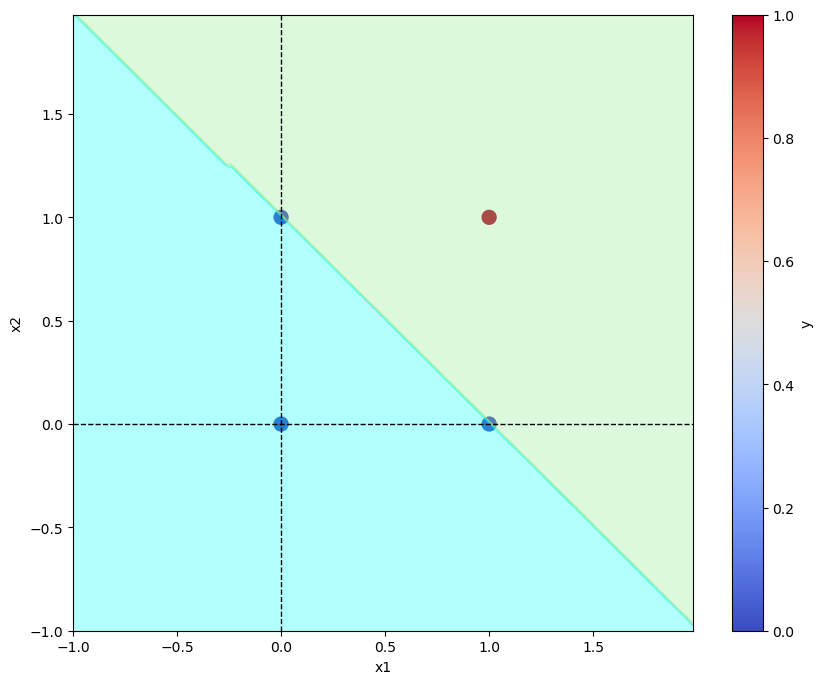

In [66]:
save_plot(df_OR, model_or, filename="or.png")